# Predicting heart desease using machine learning


we are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/code/cdabakoglu/heart-disease-classifications-machine-learning

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load modal 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_roc_curve

# Load train test split

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [5]:
df=pd.read_csv("csv/heart-disease.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

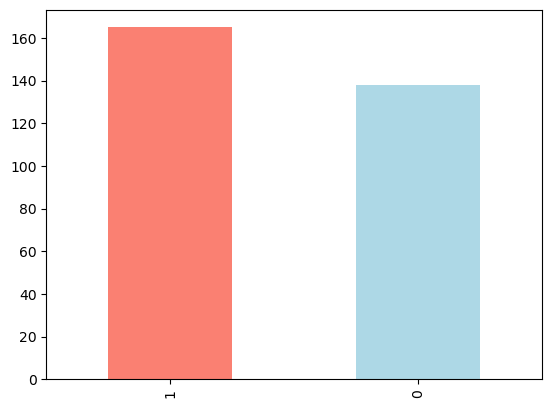

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

               # type: ignore

In [8]:
df.isna().sum() # To check if there is any missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Freq according to sex

<AxesSubplot:>

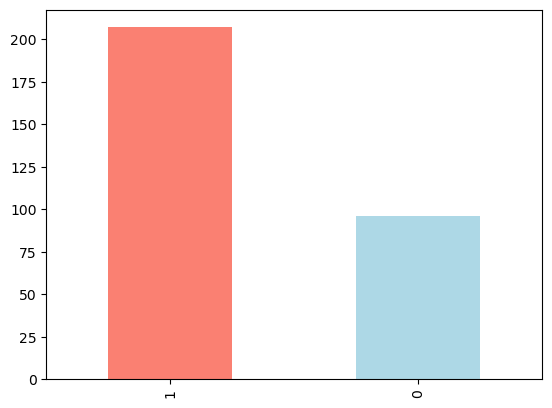

In [10]:
df.sex.value_counts().plot(kind="bar",color=["salmon","lightblue"])
# 1 -> male
# 0 -> Female

In [11]:
# compare the target with sex

pd.crosstab(df.target,df.sex)

# 93 men out of 207 have heart disease
# 72 female out of 96 have heart disease

sex,0,1
target,,
0,24,114
1,72,93


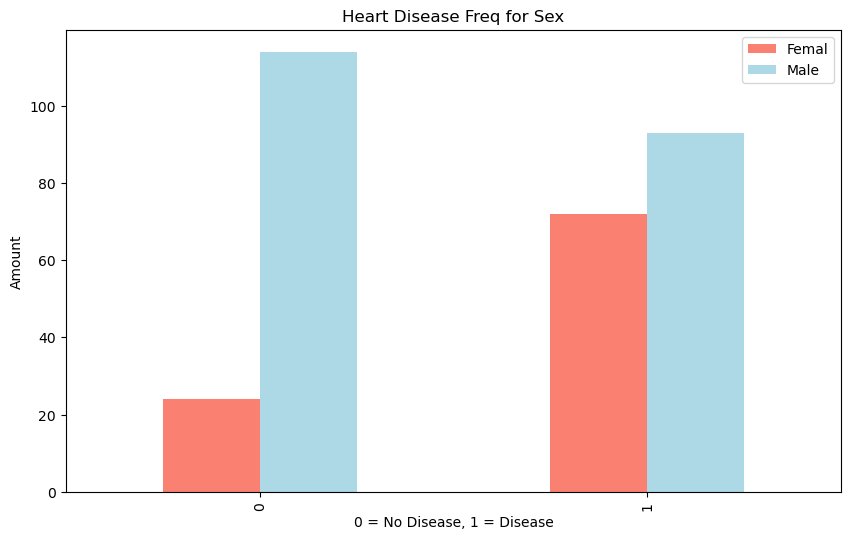

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"],title="Heart Disease Freq for Sex")

plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")

plt.legend(["Femal","Male"])


 ### Age vs Max Heart Rate for Heart Disease

Text(0, 0.5, 'Max Heart Rate')

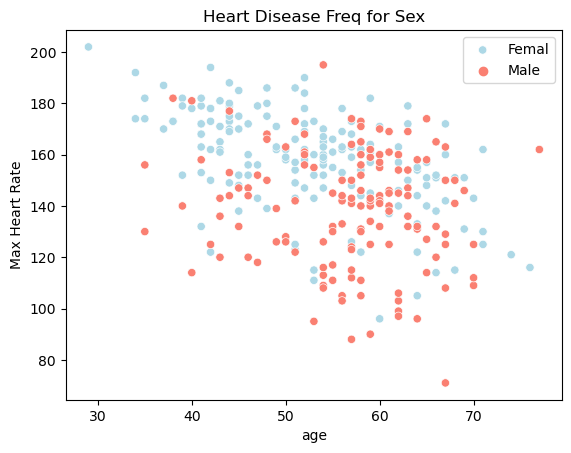

In [13]:
sns.scatterplot(x=df.age,y=df.thalach,hue="target",data=df,palette=["salmon","lightblue"],)
plt.title("Heart Disease Freq for Sex")
 
plt.legend(["Femal","Male"])
plt.ylabel("Max Heart Rate")

<AxesSubplot:xlabel='age', ylabel='Count'>

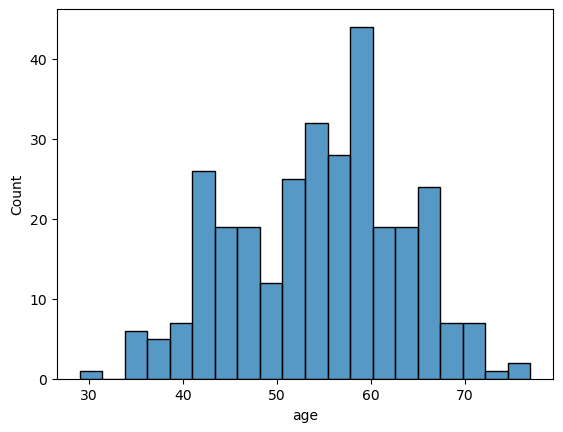

In [14]:
# distribution of age

sns.histplot(df.age,bins=20)


### Heart Disease Freq according to Chest Pain Type
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease



In [15]:

""" here we can see that people with chest pain 1,2,3 have heart disease
 out of 143 people with chest pain type 0 only 39 have heart disease

 out of 50 people with chest pain type 1 only 23 have heart disease

 out of 87 people with chest pain type 2 only 69 have heart disease

 out of 23 people with chest pain type 3 only 96 have heart disease
"""

pd.crosstab(df.target,df.cp)


cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


<AxesSubplot:title={'center':'Heart Disease Freq for Chest Pain Type'}, xlabel='cp'>

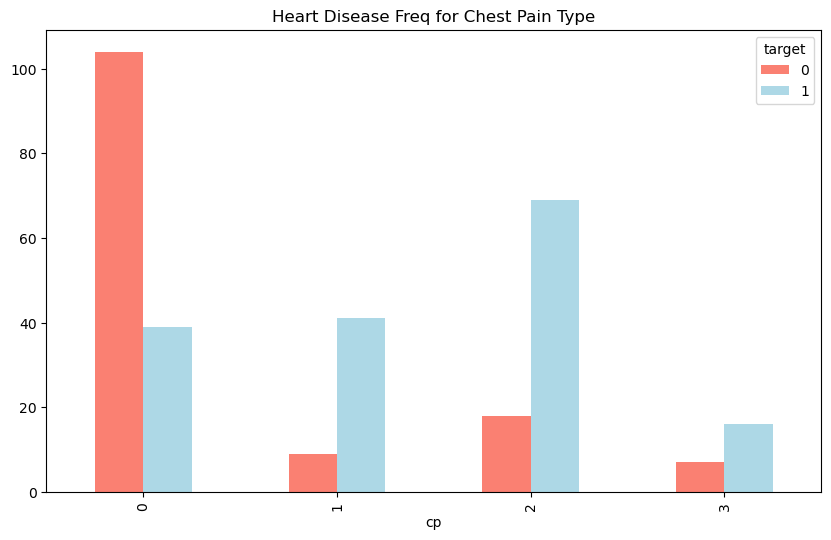

In [16]:
# plt them

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"],title="Heart Disease Freq for Chest Pain Type")


## Building a correlation matrix

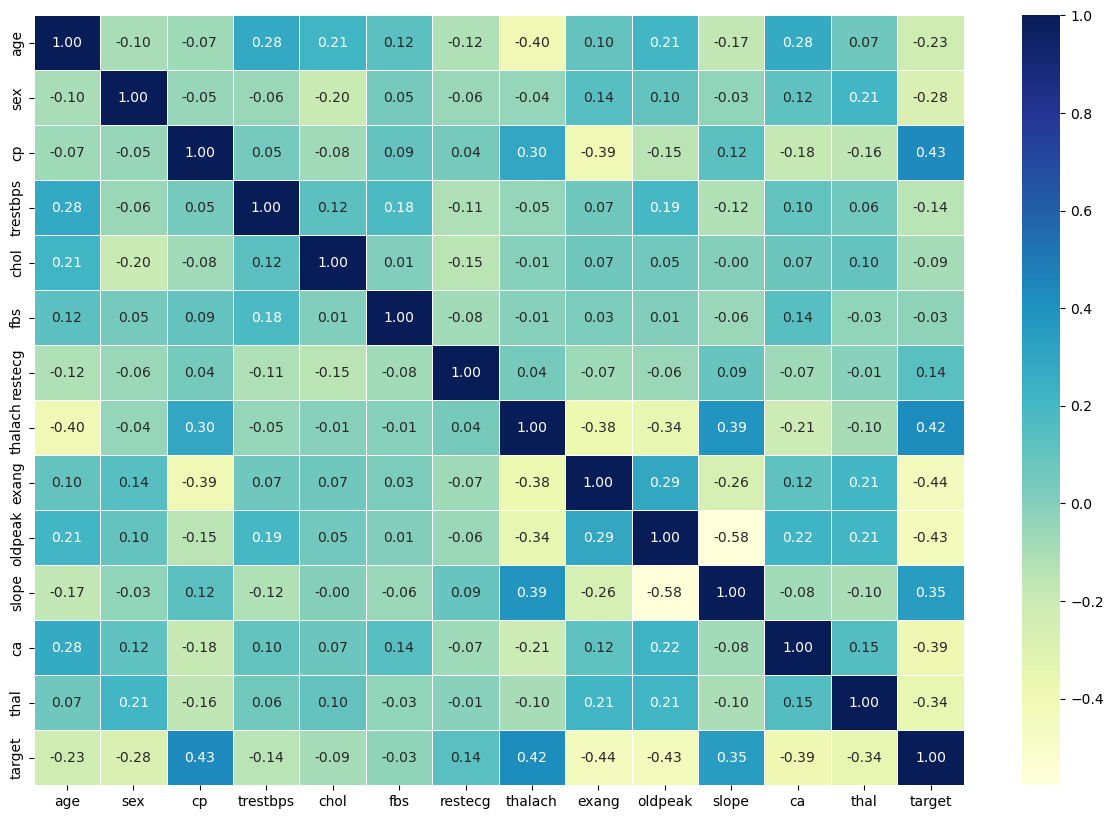

In [17]:
# let us plot the correlation matrix

corr_matrix=df.corr()

fig,ax=plt.subplots(figsize=(15,10))

ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [18]:
# split dat into train and test sets

X=df.drop("target",axis=1)
y=df["target"]

np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((242, 13), (61, 13), (242,), (61,))

Now we have got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbours - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

In [19]:
# put models in a dictionary

models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()
        }

# function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Info about the function
        models: a dict of different scikit learn models
        X_train: training data (no labels)
        X_test: testing data (no labels)
        y_train: training labels
        y_test: test labels
    """
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)

    return model_scores

model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)

/Volumes/Project/software/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Volumes/Project/software/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

<AxesSubplot:>

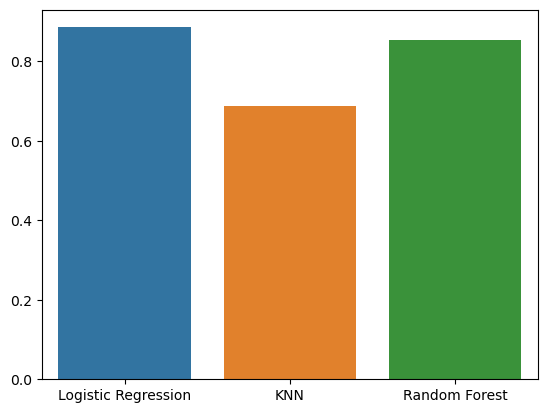

In [20]:

model_scores=pd.DataFrame(model_scores,index=["accuracy"])

sns.barplot(data=model_scores)